ZADANIE 1

<Figure size 800x600 with 0 Axes>

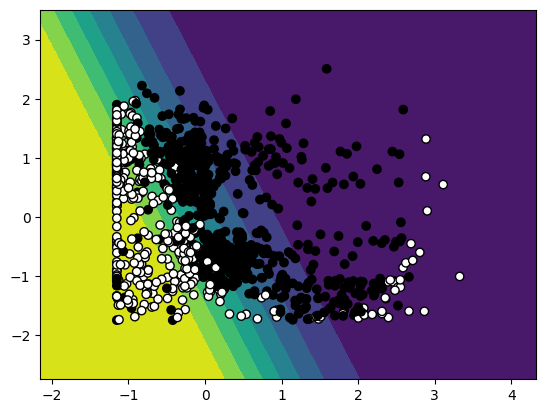

layer:(1, 1) acccuracy: 0.837037037037037


<Figure size 800x600 with 0 Axes>

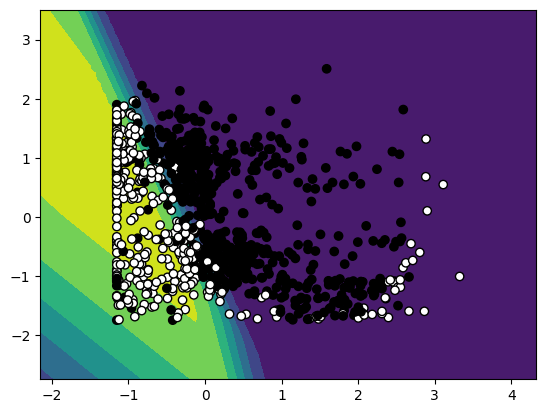

layer:(5, 2) acccuracy: 0.837037037037037


<Figure size 800x600 with 0 Axes>

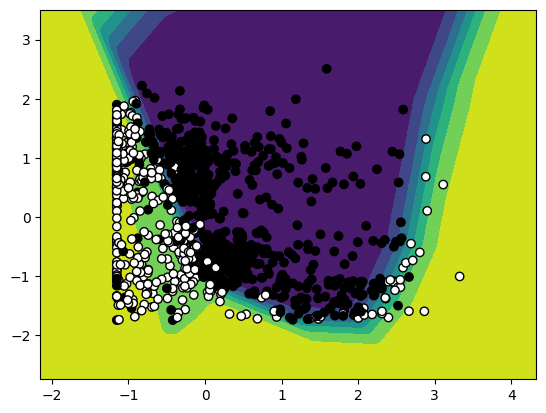

layer:(10, 5) acccuracy: 0.9


<Figure size 800x600 with 0 Axes>

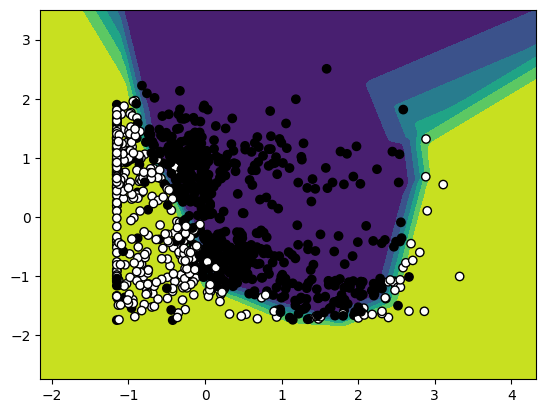

layer:(10, 5, 2) acccuracy: 0.8925925925925926


<Figure size 800x600 with 0 Axes>

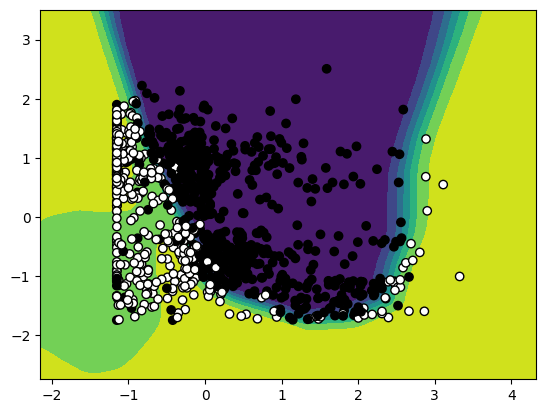

layer:(100, 50, 20) acccuracy: 0.8962962962962963


In [32]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.inspection import DecisionBoundaryDisplay


data = pd.read_csv('medicine.txt', sep = ',', header = None)
data = data.drop(0)
# print(data.head())
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(data.iloc[:,0:2])
y = data.iloc[:,2]
y = y.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.2)

for layer in [(1,1), (5,2),(10,5), (10,5,2),(100,50,20)]:
  network = MLPClassifier(hidden_layer_sizes=layer, max_iter=1000, random_state=42)

  network.fit(X_train,y_train)
  predicted_labels = network.predict(X_test)


  plt.figure(figsize=(8,6))
  display = DecisionBoundaryDisplay.from_estimator(network, X_train, cmap='viridis')
  plt.scatter(X_train[:,0],X_train[:,1], c=y_train, edgecolors='k')
  plt.show()
  print(f"layer:{layer} acccuracy: {network.score(X_test,y_test)}")


Najlepiej poradziła sobie warstwa (10, 5), gdyż uzyskała najwyższą trafność na zbiorze testowym. Zbyt duża liczba neuronów w warstwach prowadzi do overfittingu, zbyt mała - do underfittingu.

**ZADANIE 2**


In [17]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

digits = datasets.load_digits()
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.2)

network = MLPClassifier(solver='sgd',hidden_layer_sizes=(10, 5,5,5), max_iter = 1000, tol = 0.001, activation = 'identity')
network.fit(X_train,y_train)
predicted_labels = network.predict(X_train)
matrix = confusion_matrix(y_train, predicted_labels)

print(network.score(X_test,y_test))


0.8861111111111111


Skuteczność wyniosła 0.93 dla zbioru testowego, co jest wynikiem zadowalającym.

ZADANIE 3


In [18]:
digits = datasets.load_digits()
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.2)

for layer in [(10, 5), (10, 5,5,5), (30, 25,25,15)]:
    for epoch in [100, 200, 500]:
        network = MLPClassifier(hidden_layer_sizes=layer, max_iter = epoch, tol = 0.001)
        network.fit(X_train,y_train)
        predicted_labels = network.predict(X_test)
        matrix = confusion_matrix(y_test, predicted_labels)
        if layer == (10, 5, 5, 5):
            print(f'layer: {layer}, epoch: {epoch}, score: {network.score(X_test,y_test)}')
            print(matrix)



layer: (10, 5, 5, 5), epoch: 100, score: 0.7388888888888889
[[33  0  0  0  1  2  0  0  0  0]
 [ 0  1 33  1  0  0  0  0  1  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  1  2 32  0  0  0  0  1  1]
 [ 0  0  0  0 35  0  0  0  0  1]
 [ 8  0  0  0  0 25  0  0  0  4]
 [ 0  0  0  0  0  0 36  0  0  0]
 [ 0  0  0  0  1  0  0 35  0  0]
 [ 0  4 22  3  0  0  0  0  3  3]
 [ 0  1  0  1  0  1  0  1  1 31]]
layer: (10, 5, 5, 5), epoch: 200, score: 0.8527777777777777
[[35  0  0  1  0  0  0  0  0  0]
 [ 0 33  0  0  0  0  1  0  2  0]
 [ 0  0 31  1  0  0  3  0  0  0]
 [ 0  0  1 32  0  0  0  0  4  0]
 [ 0  1  0  0 33  0  0  2  0  0]
 [ 0  1  0  0  0 32  0  2  2  0]
 [ 0  1  1  0  0  0 34  0  0  0]
 [ 0  1  0  0 10  2  0 22  0  1]
 [ 0  4  0  2  0  1  0  0 27  1]
 [ 0  0  0  3  0  2  0  1  2 28]]
layer: (10, 5, 5, 5), epoch: 500, score: 0.9138888888888889
[[34  0  0  0  1  0  1  0  0  0]
 [ 0 31  0  0  1  0  0  0  3  1]
 [ 0  0 34  1  0  0  0  0  0  0]
 [ 0  0  3 31  0  0  0  0  0  3]
 [ 0  0  0  0 36  0  0  0 

Zwiększenie liczby epok jak i ilości warst ukrytych uczenia zwiększa skuteczność klasyfikacji. Jednak w przypadku zbyt dużej liczby epok lub warst  uczenia, sieć może zacząć się przeuczać, co oznacza, że zamiast generalizować, zaczyna zapamiętywać dane uczące. W przypadku zbyt małej liczby epok uczenia, sieć może nie zdążyć nauczyć się wszystkich wzorców. 


In [19]:
# Proszę zbadać wpływ współczynnika uczenia (learning_rate) podczas używania algorytmu SGD.

digits = datasets.load_digits()
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.2)

for rate in [0.1,0.01,0.001,0.0001]:
    network = MLPClassifier(hidden_layer_sizes=(10, 5,5,5), max_iter = epoch, tol = 0.001, learning_rate_init=rate)
    network.fit(X_train,y_train)
    predicted_labels = network.predict(X_test)
    matrix = confusion_matrix(y_test, predicted_labels)
    print(f'rate: {rate}, score: {network.score(X_test,y_test)}')
    print(matrix)



rate: 0.1, score: 0.10277777777777777
[[ 0 36  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]]
rate: 0.01, score: 0.8666666666666667
[[33  0  0  0  2  0  1  0  0  0]
 [ 0 28  6  0  0  1  0  2  0  0]
 [ 0  1 34  0  0  0  0  0  0  0]
 [ 0  3  2 26  0  0  0  0  5  1]
 [ 0  0  0  0 36  0  0  0  0  0]
 [ 0  0  0  0  0 31  2  0  0  3]
 [ 1  0  0  0  0  1 34  0  0  0]
 [ 0  1  1  0  0  0  1 33  0  0]
 [ 0  5  0  2  0  0  0  0 26  2]
 [ 0  2  0  0  0  1  0  0  2 31]]
rate: 0.001, score: 0.8861111111111111
[[34  0  0  0  0  0  0  0  2  0]
 [ 0 28  2  0  0  1  0  0  2  4]
 [ 0  1 33  1  0  0  0  0  0  0]
 [ 0  0  0 28  0  8  0  1  0  0]
 [ 0  0  0  0 36  0  0  0  0  0]
 [ 1  0  0  2  0 32  0  1  0  0]
 [ 0  0  0  0  0  0 35  0

Parametr learning_rate określa jak szybko sieć ma się uczyć. Wartość learning_rate=0.1 jest zbyt duża, co powoduje, że sieć może nie nauczyć się wzorców. Wartość learning_rate=0.0001 jest zbyt mała, co powoduje, że sieć uczy się zbyt wolno.

ZADANIE 4


In [34]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
yeast = fetch_ucirepo(id=110) 
  
# data (as pandas dataframes) 
X = yeast.data.features 
y = yeast.data.targets  

In [21]:
X.head()

,mcg,gvh,alm,mit,erl,pox,vac,nuc
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22


In [22]:
X.describe()

,mcg,gvh,alm,mit,erl,pox,vac,nuc
count,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000
mean,0.500121,0.499933,0.500034,0.261186,0.504717,0.007500,0.499885,0.276199
std,0.137299,0.123924,0.086670,0.137098,0.048351,0.075683,0.057797,0.106491
min,0.110000,0.130000,0.210000,0.000000,0.500000,0.000000,0.000000,0.000000
25%,0.410000,0.420000,0.460000,0.170000,0.500000,0.000000,0.480000,0.220000
50%,0.490000,0.490000,0.510000,0.220000,0.500000,0.000000,0.510000,0.220000
75%,0.580000,0.570000,0.550000,0.320000,0.500000,0.000000,0.530000,0.300000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.830000,0.730000,1.000000


In [23]:
y.value_counts()

localization_site
CYT                  463
NUC                  429
MIT                  244
ME3                  163
ME2                   51
ME1                   44
EXC                   35
VAC                   30
POX                   20
ERL                    5
Name: count, dtype: int64

In [35]:
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.validation import column_or_1d
le = LabelEncoder()
y = column_or_1d(y, warn=True)
y = le.fit_transform(y)
np.unique(y)

TypeError: <lambda>() got an unexpected keyword argument 'stacklevel'

In [ ]:
import time
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.2)

network = MLPClassifier (hidden_layer_sizes=(50,30,20),activation='relu', max_iter = 1000, tol = 0.001, solver='adam')

start_time = time.time()
network.fit(X_train,y_train)
end_time = time.time()
predicted_labels = network.predict(X_test)
matrix = confusion_matrix(y_test, predicted_labels)
print(f'czas uczenia: {end_time-start_time}')
print(network.score(X_test,y_test))
print(matrix)


czas uczenia: 1.1120343208312988
0.5454545454545454
[[60  0  0  0  0  2  7 24  0  0]
 [ 0  0  0  0  1  0  0  0  0  0]
 [ 1  0  3  2  0  0  1  0  0  0]
 [ 0  0  0  8  1  0  0  0  0  0]
 [ 2  0  1  2  3  2  0  0  0  0]
 [ 1  0  0  0  0 27  1  3  0  0]
 [18  0  1  0  1  2 22  3  2  0]
 [33  0  1  0  0  5  9 38  0  0]
 [ 2  0  0  0  0  1  0  0  1  0]
 [ 4  0  0  0  0  1  1  0  0  0]]


Zadanie 4 wnioski: Biorąc pod uwagę fakt, iż niektóre klasy są znacznie liczniejsze od innych, trafność na poziomie 0.5 jest dobra. Warto zauważyć, że w przypadku tak nierównych klas, trafność 0.5 oznacza, że klasyfikator jest w stanie rozpoznać klasy znacznie lepiej niż losowo. Model więc jest  stronniczy wobec klas, które są nadreprezentowane w danych. Może to prowadzić do wyższej dokładności dla tych klas kosztem klas mniej reprezentowanych.